# ROC academic

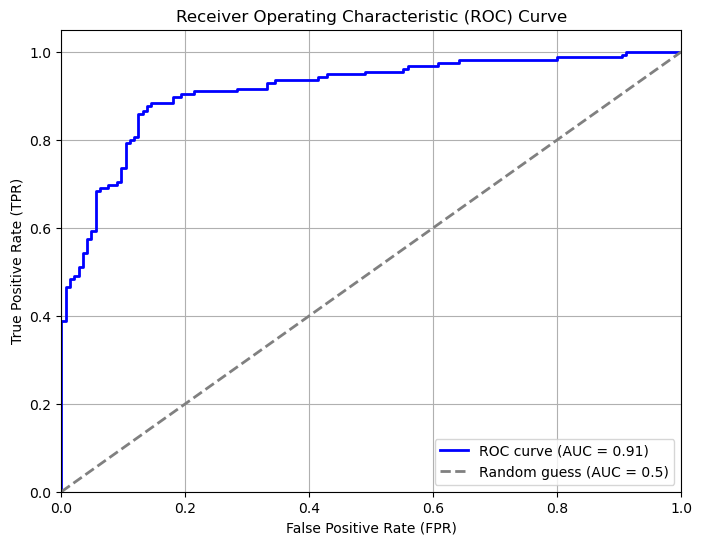

AUC: 0.9142


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Generate a synthetic binary classification dataset
# X will have features, y will have binary labels (0 or 1)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a simple classifier (Logistic Regression in this case)
model = LogisticRegression(solver='liblinear') # liblinear is good for smaller datasets
model.fit(X_train, y_train)

# 4. Get predicted probabilities for the positive class (class 1)
# For ROC curve, we need probabilities, not just hard predictions
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of class 1

# 5. Calculate ROC curve data points
# fpr: False Positive Rates
# tpr: True Positive Rates
# thresholds: The thresholds used to calculate fpr and tpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 6. Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# 7. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random guess (AUC = 0.5)') # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) # A bit of padding at the top
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {auc:.4f}")

# You can also look at some of the thresholds and corresponding FPR/TPR
# print("\nThresholds | FPR      | TPR")
# for i in range(0, len(thresholds), max(1, len(thresholds)//10)): # Print about 10 thresholds
#     if thresholds[i] <=1 : # Only show relevant thresholds
#       print(f"{thresholds[i]:.4f}     | {fpr[i]:.4f}   | {tpr[i]:.4f}")

# ROC personal

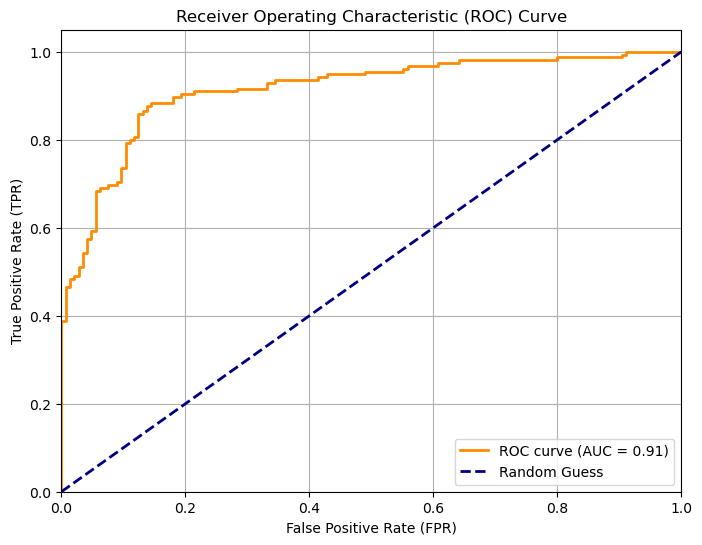

AUC: 0.9142

Demonstration of the Data-Driven Approach:
1. Data Generation/Collection: We used synthetic data, but in real projects, this is observed data.
2. Model Training: The Logistic Regression model's parameters were 'learned' from the training data (X_train, y_train).
3. Prediction: The probabilities 'y_pred_proba' are a direct result of applying the data-trained model to new data (X_test).
4. Evaluation: The ROC curve and AUC are calculated based on comparing these data-driven predictions against the true labels (y_test). The curve itself shows performance across many thresholds, all evaluated on the data.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.datasets import make_classification

# --- 1. Data-Driven: Generating Synthetic Data ---
# We'll use make_classification to create a sample binary classification dataset.
# In a real-world scenario, this data would be collected and preprocessed.
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# --- 2. Data-Driven: Splitting Data ---
# The model learns from the training set and is evaluated on the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Data-Driven: Training a Model ---
# We choose a Logistic Regression model. Its parameters (coefficients)
# will be learned directly from the X_train and y_train data.
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# --- 4. Data-Driven: Getting Predictions ---
# Get predicted probabilities for the positive class (class 1) on the test set.
# These probabilities are derived from the model, which was derived from the data.
y_pred_proba = model.predict_proba(X_test)[:, 1]

# --- 5. Data-Driven: Calculating ROC Curve Metrics ---
# The roc_curve function takes the true labels and predicted probabilities
# (both data-driven) to compute FPR, TPR, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Alternatively, you can use roc_auc_score directly with y_test and y_pred_proba
# roc_auc_direct = roc_auc_score(y_test, y_pred_proba)
# print(f"AUC (calculated directly): {roc_auc_direct:.2f}")


# --- 6. Visualizing the ROC Curve ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess') # Line of no-discrimination
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC: {roc_auc:.4f}")

# --- How this demonstrates the Data-Driven Approach ---
print("\nDemonstration of the Data-Driven Approach:")
print("1. Data Generation/Collection: We used synthetic data, but in real projects, this is observed data.")
print("2. Model Training: The Logistic Regression model's parameters were 'learned' from the training data (X_train, y_train).")
print("3. Prediction: The probabilities 'y_pred_proba' are a direct result of applying the data-trained model to new data (X_test).")
print("4. Evaluation: The ROC curve and AUC are calculated based on comparing these data-driven predictions against the true labels (y_test). " \
"The curve itself shows performance across many thresholds, all evaluated on the data.")